# Dataset Creation

In [1]:
import pandas as pd
import numpy as np
import requests
import io
import wbgapi as wb
from bs4 import BeautifulSoup
import cache_magic #pip install ipython_cache
import geopandas as gpd

%cache magic is now registered in ipython


# Femicide Data

### Femicide data is downloaded from github and loaded as df_fem

In [2]:
url = 'https://raw.githubusercontent.com/Tom-Whittington/Femicide_analysis/main/processed_data/original_femicide_data.csv'

In [3]:
%cache download = requests.get(url).content

loading cached value for variable 'download'. Time since pickling  141 days, 17:40:31.220657


In [4]:
df_fem = pd.read_csv(io.StringIO(download.decode('utf-8')),
                dtype={'iso3_code' : 'category',
                           'Region' : 'category',
                           'Subregion' : 'category',
                           'country' : 'category',
                           'Indicator' : 'category',
                           'Disaggregation' : 'category',
                           'Gender' : 'category',
                           'Source' : 'category',
                           'Unit' : 'category',
                          'Year' : 'string'})

In [5]:
df_fem

,Region,Subregion,country,iso3_code,Indicator,Disaggregation,Gender,Source,Unit,Year,Value,Footnote
0,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Total (all ages),NSO,Count,2009,1115,NaN
1,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Total (all ages),NSO,"Rate per 100,000 population",2009,3.93,NaN
2,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Total (all ages),NSO,Count,2010,983,NaN
3,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Total (all ages),NSO,"Rate per 100,000 population",2010,3.37,NaN
4,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Total (all ages),NSO,Count,2011,1231,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24387,Africa,Sub-Saharan Africa,Zimbabwe,ZWE,Homicide: # of victims,-,Total (all ages),WHO,"Rate per 100,000 population",2006,8.82,NaN
24388,Africa,Sub-Saharan Africa,Zimbabwe,ZWE,Homicide: # of victims,-,Total (all ages),WHO,Count,2010,711,NaN
24389,Africa,Sub-Saharan Africa,Zimbabwe,ZWE,Homicide: # of victims,-,Total (all ages),WHO,"Rate per 100,000 population",2010,5.6,NaN
24390,Africa,Sub-Saharan Africa,Zimbabwe,ZWE,Homicide: # of victims,-,Total (all ages),WHO,Count,2012,981,NaN


In [6]:
df_fem.dtypes

Region            category
Subregion         category
country           category
iso3_code         category
Indicator         category
Disaggregation    category
Gender            category
Source            category
Unit              category
Year                string
Value               object
Footnote            object
dtype: object

### Columns are renamed

In [7]:
df_fem.columns = [col.lower() for col in df_fem.columns]
df_fem = df_fem.rename(columns={'iso3_code' : 'iso3'})
df_fem

,region,subregion,country,iso3,indicator,disaggregation,gender,source,unit,year,value,footnote
0,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Total (all ages),NSO,Count,2009,1115,NaN
1,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Total (all ages),NSO,"Rate per 100,000 population",2009,3.93,NaN
2,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Total (all ages),NSO,Count,2010,983,NaN
3,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Total (all ages),NSO,"Rate per 100,000 population",2010,3.37,NaN
4,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Total (all ages),NSO,Count,2011,1231,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24387,Africa,Sub-Saharan Africa,Zimbabwe,ZWE,Homicide: # of victims,-,Total (all ages),WHO,"Rate per 100,000 population",2006,8.82,NaN
24388,Africa,Sub-Saharan Africa,Zimbabwe,ZWE,Homicide: # of victims,-,Total (all ages),WHO,Count,2010,711,NaN
24389,Africa,Sub-Saharan Africa,Zimbabwe,ZWE,Homicide: # of victims,-,Total (all ages),WHO,"Rate per 100,000 population",2010,5.6,NaN
24390,Africa,Sub-Saharan Africa,Zimbabwe,ZWE,Homicide: # of victims,-,Total (all ages),WHO,Count,2012,981,NaN


### Filters out totals and only keeps male and female data

In [8]:
df_fem = df_fem.loc[(df_fem['gender'] == 'Male') | (df_fem['gender'] == 'Female')]
df_fem

,region,subregion,country,iso3,indicator,disaggregation,gender,source,unit,year,value,footnote
8,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Female,NSO,Count,2015,93,NaN
9,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Female,NSO,"Rate per 100,000 population",2015,0.56,NaN
10,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Male,NSO,Count,2015,3274,NaN
11,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Male,NSO,"Rate per 100,000 population",2015,18.51,NaN
14,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Female,NSO,Count,2016,101,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24293,Americas,Latin America and the Caribbean,Venezuela (Bolivarian Republic of),VEN,Homicide: # of victims,-,Male,CTS,"Rate per 100,000 population",2017,93.88,NaN
24372,Africa,Sub-Saharan Africa,Zimbabwe,ZWE,Homicide: # of victims,-,Female,MD,Count,1990,183,NaN
24373,Africa,Sub-Saharan Africa,Zimbabwe,ZWE,Homicide: # of victims,-,Female,MD,"Rate per 100,000 population",1990,3.49,NaN
24374,Africa,Sub-Saharan Africa,Zimbabwe,ZWE,Homicide: # of victims,-,Male,MD,Count,1990,404,NaN


### Removes killed by intimate partner disaggregation

In [9]:
df_fem = df_fem[df_fem['disaggregation'] == '-']
df_fem

,region,subregion,country,iso3,indicator,disaggregation,gender,source,unit,year,value,footnote
8,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Female,NSO,Count,2015,93,NaN
9,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Female,NSO,"Rate per 100,000 population",2015,0.56,NaN
10,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Male,NSO,Count,2015,3274,NaN
11,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Male,NSO,"Rate per 100,000 population",2015,18.51,NaN
14,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Female,NSO,Count,2016,101,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24293,Americas,Latin America and the Caribbean,Venezuela (Bolivarian Republic of),VEN,Homicide: # of victims,-,Male,CTS,"Rate per 100,000 population",2017,93.88,NaN
24372,Africa,Sub-Saharan Africa,Zimbabwe,ZWE,Homicide: # of victims,-,Female,MD,Count,1990,183,NaN
24373,Africa,Sub-Saharan Africa,Zimbabwe,ZWE,Homicide: # of victims,-,Female,MD,"Rate per 100,000 population",1990,3.49,NaN
24374,Africa,Sub-Saharan Africa,Zimbabwe,ZWE,Homicide: # of victims,-,Male,MD,Count,1990,404,NaN


### Filters out counts and leaves only rate per 100k, sorts values and converts value column to numeric

In [10]:
df_fem = df_fem[df_fem['unit'] != 'Count']
df_fem = df_fem.sort_values(['year', 'gender', 'iso3'])
df_fem['value'] = pd.to_numeric(df_fem['value'], errors='coerce')


### Pivots df, using year and gender as index. Then formats new columns

In [11]:
%cache gdf = gpd.read_file('/vsicurl/https://github.com/Tom-Whittington/Femicide_analysis/raw/main/county_shapes/WB_countries_Admin0_10m.shp')
gdf = gdf[['ISO_A3', 'geometry']]
gdf = gdf.rename(columns={ 'ISO_A3' : 'iso3'})

loading cached value for variable 'gdf'. Time since pickling  1:01:58.994493


In [12]:
gdf

,iso3,geometry
0,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...
246,UMI,"POLYGON ((-75.02432 18.41726, -75.02107 18.415..."
247,UMI,"POLYGON ((-162.06086 5.88719, -162.05761 5.882..."
248,UMI,"POLYGON ((-162.40018 6.44514, -162.38528 6.445..."
249,NZL,"MULTIPOLYGON (((-171.18566 -9.36126, -171.1883..."


In [13]:
df = df_fem.merge(gdf, on='iso3', how='left')

pandas.core.frame.DataFrame

In [14]:
df = df.dropna(subset='geometry')
df = df[df['gender'] == 'Female']
df = df.sort_values('year').groupby('iso3').last()
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

<Axes: >

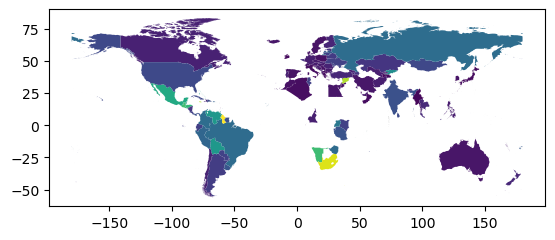

In [15]:
gdf.plot(column="value")